## GOAL: Build a simple classification model to predict "no milk" = 0 or "some milk" = 1

## Importing the libraries and the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


elvie = pd.read_csv("maxie_data.csv")
elvie.head(10)


,session_id,pump_id,bra,volume_ml,time_s,pitch_degrees,roll_degrees,ired_0,ired_1,ired_2,ired_0_calibrated,ired_1_calibrated,ired_2_calibrated
0,0,1C69,pink,140,166.7,-4.4045,-5.0160,25519.0,16525.0,25519.0,3.1597,2.8335,3.1597
1,0,1C69,pink,140,166.8,-3.1014,-4.8337,25391.0,16556.0,25391.0,3.1485,2.8370,3.1485
2,0,1C69,pink,140,166.9,-1.2492,-5.1577,24700.0,17082.0,24700.0,3.0884,2.8957,3.0884
3,0,1C69,pink,140,167.0,0.1113,-4.7377,24459.0,17063.0,24459.0,3.0674,2.8935,3.0674
4,0,1C69,pink,140,167.1,3.4719,-4.7238,25317.0,17553.0,25317.0,3.1421,2.9482,3.1421
5,0,1C69,pink,140,167.2,3.9898,-4.7792,25146.0,18153.0,25146.0,3.1272,3.0152,3.1272
6,0,1C69,pink,140,167.3,6.5694,-4.7232,24480.0,18072.0,24480.0,3.0692,3.0062,3.0692
7,0,1C69,pink,140,167.4,7.8349,-4.9699,24400.0,18723.0,24400.0,3.0623,3.0789,3.0623
8,0,1C69,pink,140,167.5,9.2564,-4.7345,24408.0,19792.0,24408.0,3.0630,3.1984,3.0630
9,0,1C69,pink,140,167.6,10.7432,-4.7141,24572.0,21978.0,24572.0,3.0772,3.4430,3.0772


## Some basic info on the dataset:

In [540]:
elvie.info()

#We have 2 object features: 'pump_id' and 'bra' that we'll need to work with in order to use them in the model. 
#The float64 and int64 can be used as it is

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161712 entries, 0 to 161711
Data columns (total 13 columns):
session_id           161712 non-null int64
pump_id              161712 non-null object
bra                  161712 non-null object
volume_ml            161712 non-null int64
time_s               161712 non-null float64
pitch_degrees        161712 non-null float64
roll_degrees         161712 non-null float64
ired_0               161712 non-null float64
ired_1               161712 non-null float64
ired_2               161712 non-null float64
ired_0_calibrated    161712 non-null float64
ired_1_calibrated    161712 non-null float64
ired_2_calibrated    161712 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 16.0+ MB


## Visualizing the features and their distributions:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2cfe0278>,
      dtype=object)

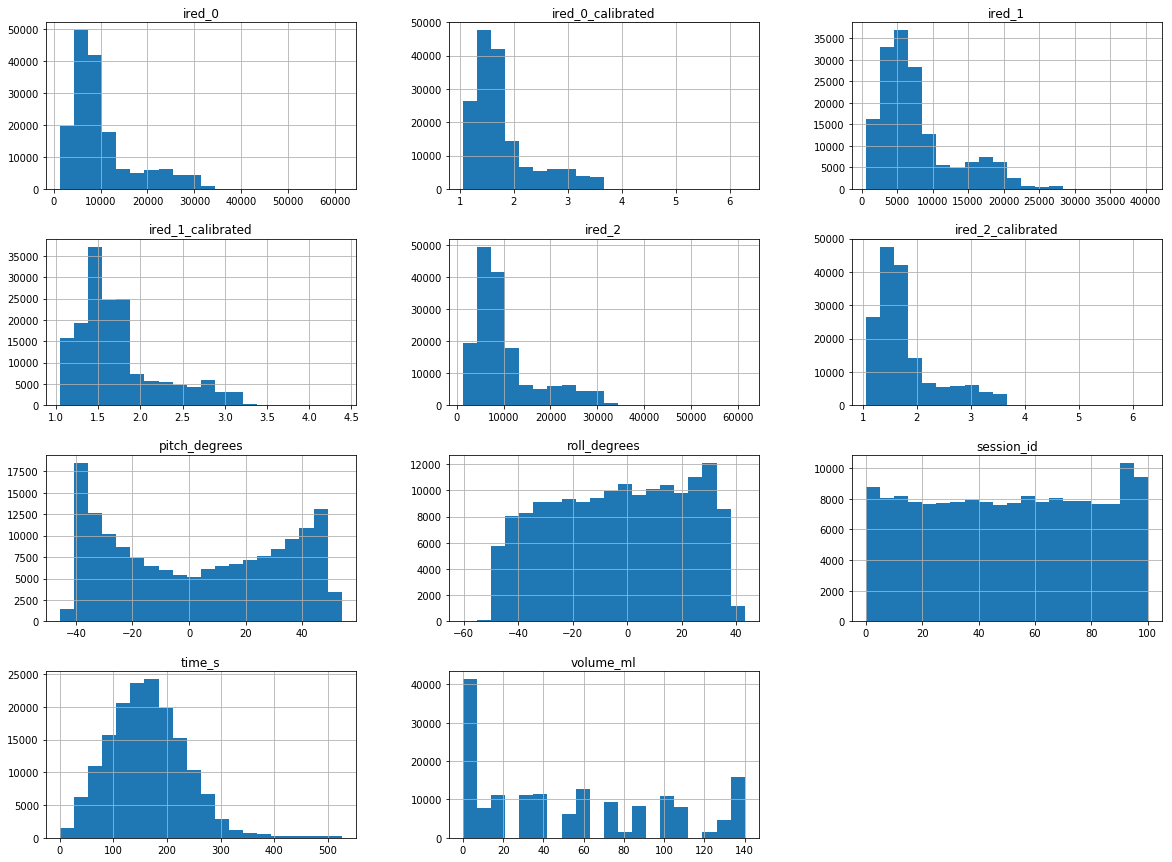

In [541]:
elvie.hist(bins=20, figsize=(20,15))

## Some basic stats on the dataset:

In [542]:
#elvie.info() #there are no missing values in any of the features

print(elvie.describe())

print(elvie['ired_0_calibrated'].unique())

          session_id      volume_ml         time_s  pitch_degrees  \
count  161712.000000  161712.000000  161712.000000  161712.000000   
mean       50.258552      53.521940     164.346914       2.980606   
std        29.552921      47.878576      72.860427      30.320551   
min         0.000000       0.000000       0.200000     -45.636900   
25%        24.000000       0.000000     113.400000     -26.976250   
50%        51.000000      40.000000     160.300000       3.208550   
75%        76.000000     100.000000     208.400000      32.242875   
max       100.000000     140.000000     526.200000      53.946800   

        roll_degrees         ired_0         ired_1         ired_2  \
count  161712.000000  161712.000000  161712.000000  161712.000000   
mean       -3.123444   10206.462322    7720.855886   10206.462322   
std        24.719071    6952.113091    5376.089437    6952.113091   
min       -60.279000    1332.000000     601.000000    1332.000000   
25%       -24.099975    5877.0000

### Correlations between volume and other features:

The ired values are strongly linearly correlated with volume_ml

In [543]:
corr_matrix = elvie.corr()

corr_matrix["volume_ml"].sort_values(ascending=False)

#corr_matrix["zero_count"].sort_values(ascending=False)

volume_ml            1.000000
ired_1_calibrated    0.805543
ired_2_calibrated    0.793440
ired_0_calibrated    0.793440
ired_2               0.792688
ired_0               0.792688
ired_1               0.792265
pitch_degrees        0.022910
roll_degrees         0.006135
time_s              -0.137882
session_id          -0.432401
Name: volume_ml, dtype: float64

### Checking distribution of some of our main and target features:

We create a new column called 'zero_count', which has a value '0' if the corresponding volume_ml = 0 and value '1' if the volume_ml > 0

### no milk = 0
### some milk = 1

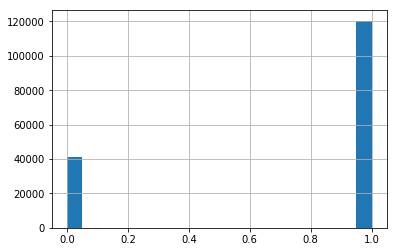

In [544]:
#Create a new column called 'zero_count'
elvie['zero_count'] = np.where(elvie['volume_ml']==0,0,1)

elvie['zero_count'].hist(bins=20)
#The histogram shows that the instances where volume_ml=0 are ~41K and where volume_ml>0 are ~120K

#sns.countplot(x='zero_count', data=elvie, palette='hls')

###  As seen above, there's an under representation of "no milk" instances.

Later on, we will over sample the "no milk" instances using SMOTE algorithm

### Checking distribution of values in some of the features:

In [545]:
print(elvie['bra'].value_counts(normalize=True)) #shows counts of each value of the attribute
print(elvie['pump_id'].value_counts(normalize=True)) 
print(elvie['volume_ml'].value_counts(normalize=True))
print(elvie['ired_0_calibrated'].value_counts(normalize=True).count())

#zero_count will be our target label
print(elvie['zero_count'].value_counts(normalize=True)) #~25.5% of all instances have volume_ml=0

black    0.250643
red      0.204790
white    0.196108
green    0.187667
pink     0.160792
Name: bra, dtype: float64
FB9B    0.226903
2BE2    0.212705
1C69    0.202650
5DEA    0.183926
60EF    0.173815
Name: pump_id, dtype: float64
0      0.255454
140    0.098539
60     0.079419
40     0.070421
30     0.068993
20     0.068474
100    0.067119
70     0.057089
90     0.050726
110    0.049396
10     0.048438
50     0.038661
130    0.028328
120    0.009566
80     0.009375
Name: volume_ml, dtype: float64
22949
1    0.744546
0    0.255454
Name: zero_count, dtype: float64


## Some more data exploration based on volume_ml = 0 or 1

In [546]:
elvie.groupby('zero_count').mean()

,session_id,volume_ml,time_s,pitch_degrees,roll_degrees,ired_0,ired_1,ired_2,ired_0_calibrated,ired_1_calibrated,ired_2_calibrated
zero_count,,,,,,,,,,,
0,80.347688,0.000000,173.913234,2.030555,-2.554818,6654.202881,4960.524328,6654.202881,1.489493,1.482563,1.489493
1,39.934951,71.885351,161.064704,3.306569,-3.318539,11425.244714,8667.927335,11425.244714,1.885605,1.822913,1.885605


### Some Observations:

1. As seen above, the means of ired 0,1 2 and their calibrated readings seem to be good predictors of "no milk" or "some milk"  


2. The pitch and roll degrees also seem to affect "no milk" or "some milk" only to a smaller extent


### We can calculate categorical means for categorical variables such as the bra colour:

In [547]:
elvie.groupby('bra').mean()

,session_id,volume_ml,time_s,pitch_degrees,roll_degrees,ired_0,ired_1,ired_2,ired_0_calibrated,ired_1_calibrated,ired_2_calibrated,zero_count
bra,,,,,,,,,,,,
black,47.463116,54.363466,148.250138,4.357400,-2.781008,7352.331442,5328.823201,7352.331442,1.550182,1.520660,1.550182,0.810767
green,58.406946,54.369316,148.559754,3.749414,-2.530234,9021.736193,7184.230032,9021.736193,1.671832,1.655252,1.671832,0.728186
pink,49.630644,58.124375,175.724014,1.956804,-4.005297,12667.815053,9263.498116,12667.815053,2.019671,1.929998,2.019671,0.705446
red,56.601534,51.513724,184.675608,1.551683,-2.469955,11019.754899,8238.989794,11019.754899,1.840573,1.782065,1.840573,0.701996
white,39.924731,49.959007,169.470700,2.816840,-4.088159,12120.623624,9485.702046,12120.623624,1.939995,1.881171,1.939995,0.752058


### Some visualization of the above table

Text(0, 0.5, 'Frequency')

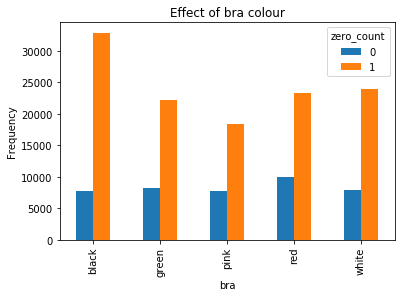

In [548]:
pd.crosstab(elvie.bra, elvie.zero_count).plot(kind='bar')
plt.title('Effect of bra colour')
plt.ylabel('Frequency')

### As seen above, it seems that the bra colour affects the volume readings. Having a black bra is much more likely to report presence of having some milk in the bottle

In [549]:
elvie.groupby('pump_id').mean()

,session_id,volume_ml,time_s,pitch_degrees,roll_degrees,ired_0,ired_1,ired_2,ired_0_calibrated,ired_1_calibrated,ired_2_calibrated,zero_count
pump_id,,,,,,,,,,,,
1C69,50.132099,55.843886,196.661820,3.340698,-0.836940,11071.747002,7566.141344,11071.747002,1.900303,1.843544,1.900303,0.699826
2BE2,44.770620,57.312266,153.461796,3.391495,-4.207902,10689.636916,7791.865424,10689.636916,1.741114,1.691467,1.741114,0.769660
5DEA,56.828094,51.593316,147.358531,4.254708,-5.525798,8148.220354,6366.204182,8148.220354,1.689538,1.673726,1.689538,0.739468
60EF,46.224598,45.335136,176.927270,-0.798701,-1.883085,9301.894585,6512.776256,9301.894585,1.737371,1.657445,1.737371,0.727266
FB9B,53.280953,55.729703,149.823721,4.136117,-3.151779,11342.043496,9815.962391,11342.043496,1.834456,1.792215,1.834456,0.778296


All pumps seem to behave similarly:

Text(0, 0.5, 'Frequency')

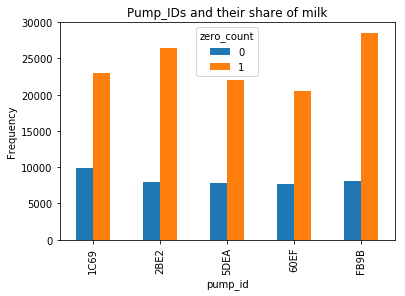

In [550]:
pd.crosstab(elvie.pump_id, elvie.zero_count).plot(kind='bar')
plt.title('Pump_IDs and their share of milk')
plt.ylabel('Frequency')

## Handling the categorical attribute "bra" with Pandas's get_dummies():

In [551]:
dummy = pd.get_dummies(elvie['bra'])
dummy.head()

# Putting the dummy variable on right side of the main dataframe:
df = pd.concat([elvie, dummy], axis = 1)
df.head()

,session_id,pump_id,bra,volume_ml,time_s,pitch_degrees,roll_degrees,ired_0,ired_1,ired_2,ired_0_calibrated,ired_1_calibrated,ired_2_calibrated,zero_count,black,green,pink,red,white
0,0,1C69,pink,140,166.7,-4.4045,-5.0160,25519.0,16525.0,25519.0,3.1597,2.8335,3.1597,1,0,0,1,0,0
1,0,1C69,pink,140,166.8,-3.1014,-4.8337,25391.0,16556.0,25391.0,3.1485,2.8370,3.1485,1,0,0,1,0,0
2,0,1C69,pink,140,166.9,-1.2492,-5.1577,24700.0,17082.0,24700.0,3.0884,2.8957,3.0884,1,0,0,1,0,0
3,0,1C69,pink,140,167.0,0.1113,-4.7377,24459.0,17063.0,24459.0,3.0674,2.8935,3.0674,1,0,0,1,0,0
4,0,1C69,pink,140,167.1,3.4719,-4.7238,25317.0,17553.0,25317.0,3.1421,2.9482,3.1421,1,0,0,1,0,0


### Scale the ired 0, 1 and 2 features:

In [552]:
from sklearn.preprocessing import StandardScaler

ired0_c = np.array(df['ired_0'])
ired1_c = np.array(df['ired_1'])
ired2_c = np.array(df['ired_2'])
pitch_c = np.array(df['pitch_degrees'])
roll_c = np.array(df['roll_degrees'])

scalar = StandardScaler()
scaled_data_ired0 = scalar.fit_transform(ired0_c[:,None])
scaled_data_ired1 = scalar.fit_transform(ired1_c[:,None])
scaled_data_ired2 = scalar.fit_transform(ired2_c[:,None])
scaled_pitch = scalar.fit_transform(pitch_c[:,None])
scaled_roll = scalar.fit_transform(roll_c[:,None])


print(ired0_c)
#print(scaled_data_ired0)
print(type(scaled_data_ired0))
print(scaled_data_ired0.min())
print(scaled_data_ired0.max())

print(scaled_data_ired1.min())
print(scaled_data_ired1.max())

print(scaled_data_ired2.min())
print(scaled_data_ired2.max())


[25519. 25391. 24700. ...  9415.  9417.  9419.]
<class 'numpy.ndarray'>
-1.2765168870308718
7.36376052796247
-1.3243600173553154
6.062444695126574
-1.2765168870308718
7.36376052796247


In [553]:
allired = np.concatenate([scaled_data_ired0, scaled_data_ired1, scaled_data_ired2, scaled_pitch, scaled_roll], axis=1)
#allired = np.column_stack((data_ired0_cal, data_ired1_cal, data_ired2_cal))
#print(allired)

#allired_1 = np.around(allired, decimals=1)
#print(allired_1)

dataset = pd.DataFrame({'ired0_cal':allired[:,0],'ired1_cal':allired[:,1],'ired2_cal':allired[:,2],'pitch_cal':allired[:,3],'roll_cal':allired[:,4]})

#Reduce cardinality of ired 0, 1 and 2:
dataset = dataset.round(3)
dataset = dataset.replace(-0.0, 0.0)
#print(dataset['ired0_cal'].value_counts())
print(dataset.head(5))
#print(dataset['ired0_cal'].value_counts().size)

   ired0_cal  ired1_cal  ired2_cal  pitch_cal  roll_cal
0      2.203      1.638      2.203     -0.244    -0.077
1      2.184      1.643      2.184     -0.201    -0.069
2      2.085      1.741      2.085     -0.140    -0.082
3      2.050      1.738      2.050     -0.095    -0.065
4      2.174      1.829      2.174      0.016    -0.065


### Create the dataframe with all scaled features:

In [554]:
final_features = pd.concat([dataset, dummy, elvie['zero_count']], axis=1)

final_features.head()

,ired0_cal,ired1_cal,ired2_cal,pitch_cal,roll_cal,black,green,pink,red,white,zero_count
0,2.203,1.638,2.203,-0.244,-0.077,0,0,1,0,0,1
1,2.184,1.643,2.184,-0.201,-0.069,0,0,1,0,0,1
2,2.085,1.741,2.085,-0.140,-0.082,0,0,1,0,0,1
3,2.050,1.738,2.050,-0.095,-0.065,0,0,1,0,0,1
4,2.174,1.829,2.174,0.016,-0.065,0,0,1,0,0,1


## Oversampling using SMOTE:

Here we use the SMOTE algorithm to over-sample the instances of "no milk", so that the number of "no milk" and "some milk" instances are the same

In [555]:
X = final_features.loc[:, final_features.columns != 'zero_count'] 
y = final_features.loc[:, final_features.columns == 'zero_count'] #target feature

from sklearn.model_selection import train_test_split

import sys
sys.path.append('/Users/Ganesh/anaconda3/lib/python3.7/site-packages/')

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)

#Splitting the training and the testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
#print(columns)

os_data_X, os_data_y=os.fit_sample(X_train, y_train) #oversampling the training data
os_data_X = pd.DataFrame(data=os_data_X, columns=columns )


os_data_y= pd.DataFrame(data=os_data_y,columns=['zero_count'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of 'no milk' instances in oversampled data",len(os_data_y[os_data_y['zero_count']==0]))
print("Number of 'some milk' instances",len(os_data_y[os_data_y['zero_count']==1]))
print("Proportion of 'no milk' instances in oversampled data is ",len(os_data_y[os_data_y['zero_count']==0])/len(os_data_X))
print("Proportion of some milk' instances in oversampled data is ",len(os_data_y[os_data_y['zero_count']==1])/len(os_data_X))

/Users/Ganesh/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


length of oversampled data is  168584
Number of 'no milk' instances in oversampled data 84292
Number of 'some milk' instances 84292
Proportion of 'no milk' instances in oversampled data is  0.5
Proportion of some milk' instances in oversampled data is  0.5


### Splitting the training and the testing sets:

In [556]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.3, random_state=0)


### Fitting the model in logistic regression:

In [557]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/Ganesh/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Ganesh/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Prediction and accuracy:

In [558]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.75


### Confusion matrix:

In [559]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[23031  2220]
 [10676 14649]]


### Classification report:

In [560]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.91      0.78     25251
           1       0.87      0.58      0.69     25325

   micro avg       0.75      0.75      0.75     50576
   macro avg       0.78      0.75      0.74     50576
weighted avg       0.78      0.75      0.74     50576



### ROC curve:

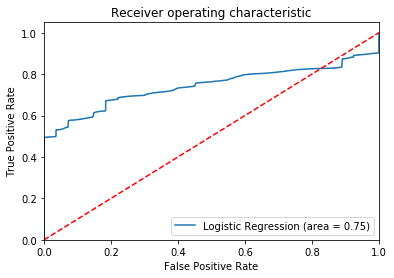

In [561]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

## Using Random Forest to build the classification model:

### Maybe we can do better with a random forest classifier?

In [562]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score

rfc = RFC()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_train)

print('Train accuracy score:',accuracy_score(y_train,y_pred))
print('Test accuracy score:', accuracy_score(y_test, rfc_b.predict(X_test)))

/Users/Ganesh/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Ganesh/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Train accuracy score: 0.9998220459629855
Test accuracy score: 0.9979239164821259


### Random Forest beats Logistic Regression on train and test with an accuracy score of .99 on each.

In [563]:
# View the predicted probabilities of the first 10 observations
rfc.predict_proba(X_train)[0:10]

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.]])

### Evaluate the classifier:

We get a score telling us how important each feature was in classifying. This is one of the most powerful parts of random forests, because we can clearly see that ired1 was the most important in classification:

In [564]:
# View a list of the features and their importance scores
list(zip(X_train, rfc.feature_importances_))

[('ired0_cal', 0.27449346999146557),
 ('ired1_cal', 0.2701590963870709),
 ('ired2_cal', 0.2643132988340001),
 ('pitch_cal', 0.021012063753164816),
 ('roll_cal', 0.014450348050783194),
 ('black', 0.06532978708540216),
 ('green', 0.02032754853840118),
 ('pink', 0.023465388950498472),
 ('red', 0.0364605302801523),
 ('white', 0.009988468129061212)]